<a href="https://colab.research.google.com/github/amachan0214/opencv/blob/master/ML_Sales_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Sales forecasting

# Project explain




*   matplotlib, seaborn - Visualization
*   pylab - procedural interface to the Matplotlib
*   numpy - Computing
*   pandas - data analysis and manipulation




In [141]:
from google.colab import files
uploaded = files.upload()

Saving sales_train_data_test.csv to sales_train_data_test (1).csv


In [237]:
#print (uploaded['sales_train_data_test.csv'][:200].decode('utf-8') + '...')
import pandas as pd
import io
from pandas import DataFrame
df_train = pd.read_csv(io.StringIO(uploaded['sales_train_data_test.csv'].decode('utf-8')))
df_train['Sales_date'] = pd.DatetimeIndex(df_train['Sales_date'])
df_train.head()
# columns = ['Sales_date', 'Amount_of_money']
df = DataFrame(df_train['Sales_date'],df_train['Amount_of_money'])
df = df.rename(columns={'Sales_date': 'ds',
                        'quantity': 'y'})
df.head(10)

,ds
Amount_of_money,
45542,2020-02-01
2366,2019-06-01
38500,2020-02-01
36600,2020-01-01
17598,2019-10-01
89916,NaT
102660,NaT
65000,NaT
10921,2019-09-01


Prophet also imposes the strict condition that the input columns be named ds (the time column) and y (the metric column), so let’s rename the columns in our DataFrame:

In [233]:
sale_date = df_train['Sales_date']
print(sale_date.loc)

In [144]:
df_train['Sales_date'] = pd.DatetimeIndex(df_train['Sales_date'])
df_train.dtypes

unit_price                      int64
quantity                        int64
Amount_of_money                 int64
Amount_tax_included             int64
Product_code                   object
Product                        object
Warehouse_Code                  int64
Warehouse                      object
marketingUnit                  object
marketingChanel                object
Slip_number                     int64
Sales_date             datetime64[ns]
Sales_year                      int64
dtype: object

In [0]:
test_train = df_train.rename(columns={'Sales_date': 'ds','Amount_of_money': 'x','quantity': 'y'})

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64


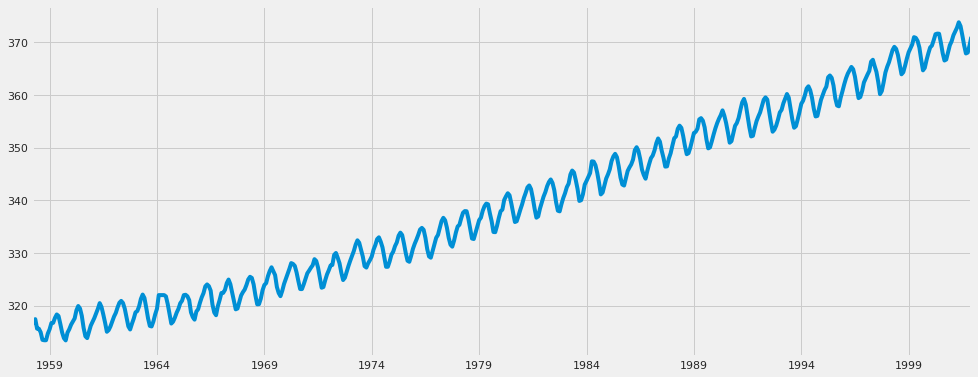

In [244]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
data = sm.datasets.co2.load_pandas()
y = data.data
# The 'MS' string groups the data in buckets by start of the month
y = y['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)
y.plot(figsize=(15, 6))
plt.show()

The ARIMA Time Series Model

One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for `**AutoregRessive Integrated Moving Average**`. ARIMA is a model that can be fitted to time series data in order to better understand or predict future points in the series.

There are three distinct integers ***(p, d, q)*** that are used to parametrize ARIMA models. Because of that, ARIMA models are denoted with the notation ARIMA***(p, d, q)***. Together these three parameters account for seasonality, trend, and noise in datasets:



*   `p` is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.

*  `d` is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.

*   `q` is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.



In [245]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [246]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624030624
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1854.828234141261
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.711172763787
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320035
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878436717715
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.6578977746117
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912939685
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048754229354
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662327715852
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941066935976
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.417471681812
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1085.52473663032
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:851.7114599176633
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893608688
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912988348939
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1675.8086923024293
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194085
ARI

In [247]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3185      0.092      3.448      0.001       0.137       0.500
ma.L1         -0.6259      0.077     -8.179      0.000      -0.776      -0.476
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8767      0.026    -33.782      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.633      0.000       0.089       0.106


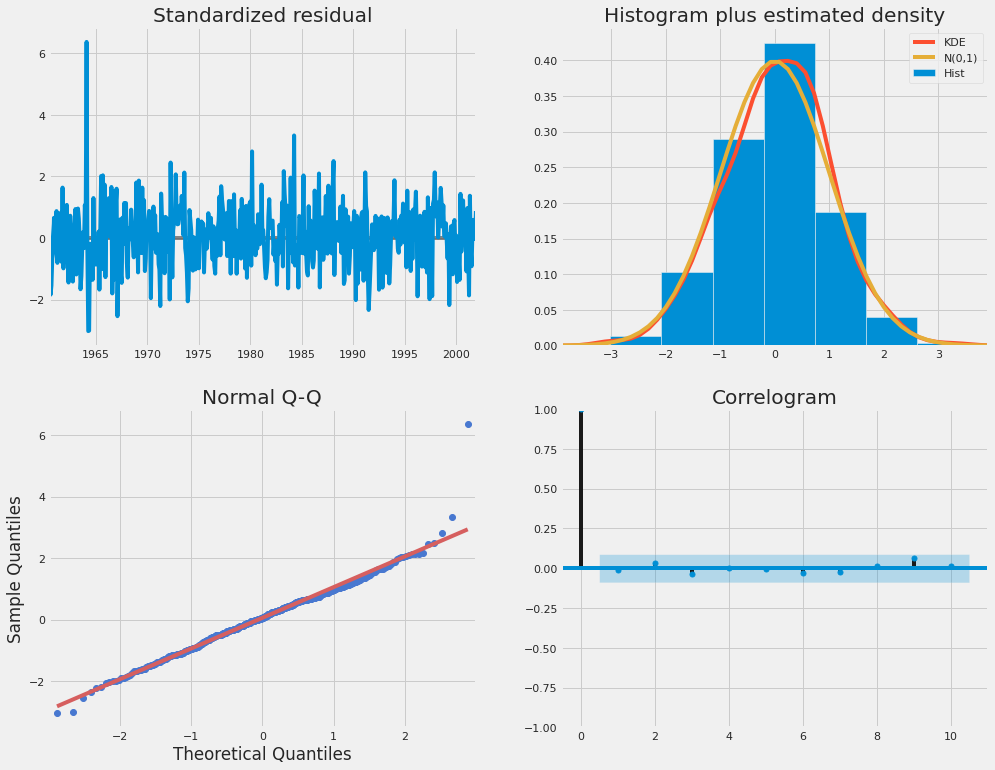

In [248]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Validating Forecasts

In [0]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

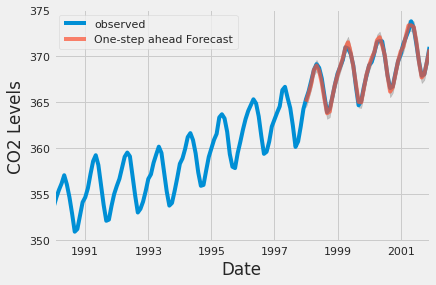

In [250]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [251]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [0]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

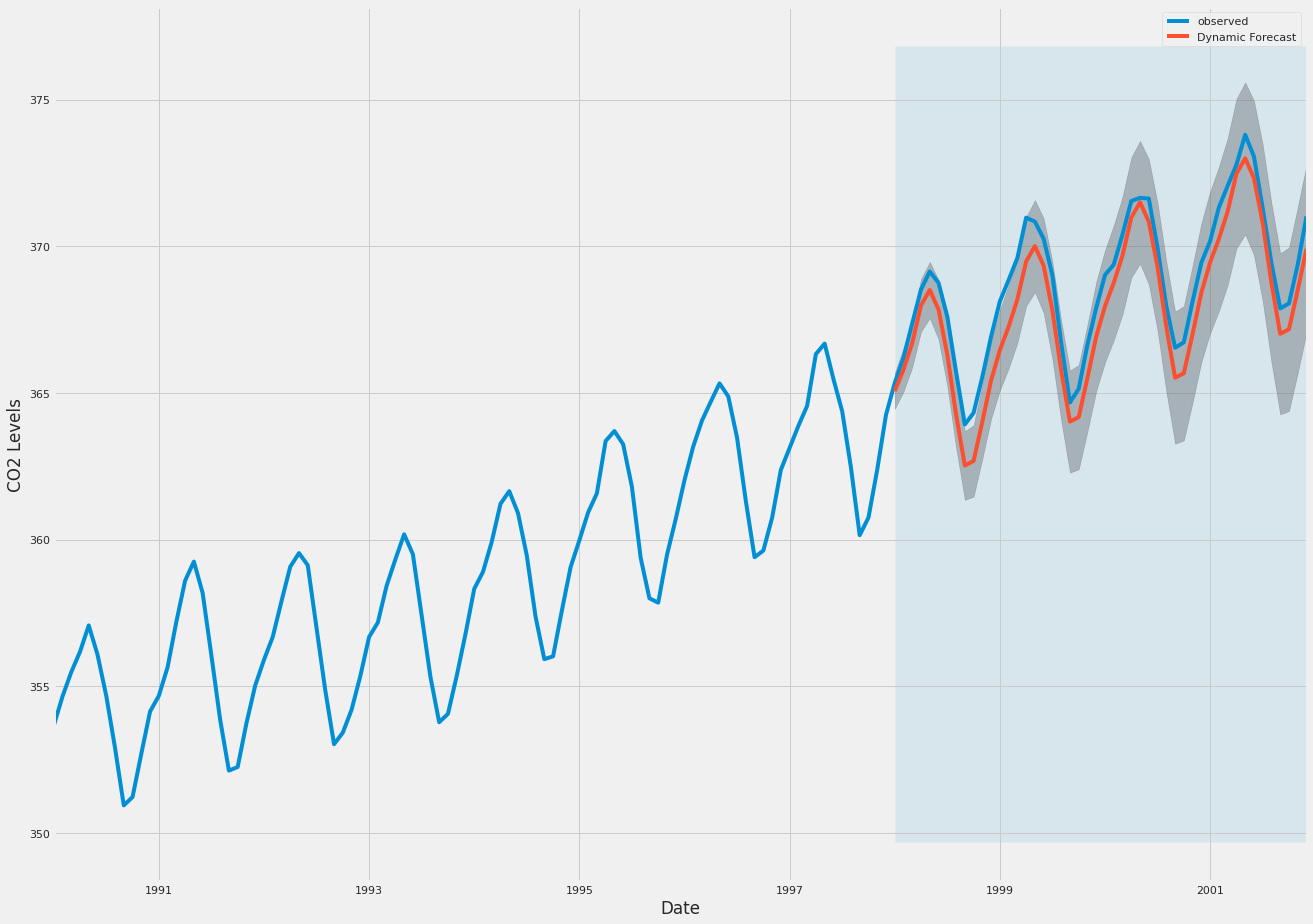

In [253]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [254]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01


In [0]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

old  data 2002-01-01    371.366747
2002-02-01    372.005932
2002-03-01    372.835016
2002-04-01    373.963471
2002-05-01    374.387865
                 ...    
2043-04-01    410.881414
2043-05-01    411.295085
2043-06-01    410.645856
2043-07-01    409.053211
2043-08-01    406.955299
Freq: MS, Name: lower co2, Length: 500, dtype: float64
starting forecast 2002-01-01    372.588572
2002-02-01    373.492237
2002-03-01    374.489460
2002-04-01    375.755492
2002-05-01    376.303308
                 ...    
2043-04-01    467.644272
2043-05-01    468.203313
2043-06-01    467.699049
2043-07-01    466.250992
2043-08-01    464.297300
Freq: MS, Name: upper co2, Length: 500, dtype: float64
<bound method Axes.set_ylabel of <matplotlib.axes._subplots.AxesSubplot object at 0x7f6801cf25c0>>


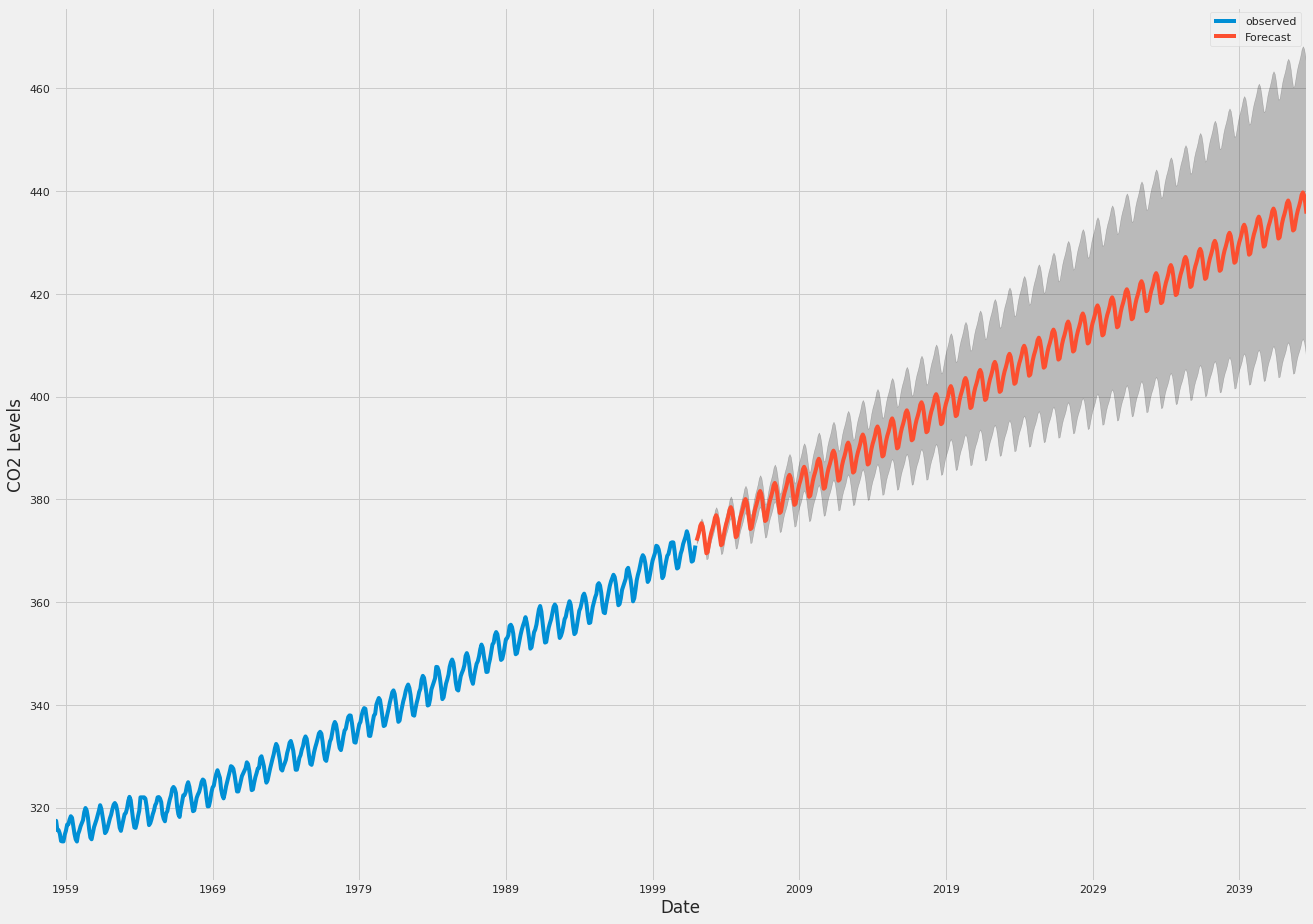

In [263]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
print('old  data',pred_ci.iloc[:, 0])
print('starting forecast',pred_ci.iloc[:, 1])
print(ax.set_ylabel)
plt.legend()
plt.show()